**Keras MNIST 데이터를 이용한 Deep Learning**

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape(60000, 784) / 255.0
X_test = X_test.reshape(10000, 784) / 255.0

print(X_test[2])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [19]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_test_onehot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim = 784, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

c:\Users\gadi2\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(X_train, y_train_onehot, epochs = 30, verbose=1, shuffle=True)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8768 - loss: 0.4159
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9676 - loss: 0.1043
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9786 - loss: 0.0689
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0492
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0364
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0307
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0242
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0209
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0189
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9943 - loss: 0.0175
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 12/30
1875/1875 ━━━━━━━━

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test loss : {test_loss:.4f}')
print(f'Test Accuracy : {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9765 - loss: 0.1645
Test loss : 0.1372
Test Accuracy : 0.9807


In [26]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)
y_pred_labels = np.argmax(y_pred, axis=1)

misclassified_index = []
for i in range(len(y_pred_labels)) :
    if y_pred_labels[i] != y_test[i] :
        misclassified_index.append(i)

print(misclassified_index)        

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
(10000, 10)
[[1.8694929e-31 2.1887736e-21 2.6570784e-21 ... 1.0000000e+00
  3.1438677e-24 1.9058279e-15]
 [3.3046809e-29 5.5441103e-19 1.0000000e+00 ... 7.9051359e-30
  1.5509207e-26 0.0000000e+00]
 [2.5550341e-21 1.0000000e+00 3.6056165e-13 ... 3.2188238e-11
  7.1159490e-13 2.8411261e-16]
 ...
 [0.0000000e+00 5.1091776e-31 5.5157053e-38 ... 1.1554513e-27
  1.3791174e-26 1.1489060e-21]
 [7.7106679e-26 3.3303852e-28 4.2644443e-26 ... 1.6022665e-25
  3.1978509e-16 1.7618263e-34]
 [1.2255522e-24 2.9775432e-31 3.5787751e-23 ... 0.0000000e+00
  1.2620210e-25 4.8275639e-28]]
[20, 217, 247, 321, 340, 381, 391, 445, 495, 543, 582, 583, 659, 684, 720, 844, 947, 951, 956, 1014, 1039, 1112, 1156, 1166, 1178, 1182, 1226, 1232, 1242, 1247, 1260, 1299, 1331, 1364, 1393, 1414, 1496, 1522, 1527, 1530, 1531, 1549, 1609, 1681, 1722, 1737, 1754, 1790, 1878, 1901, 1941, 1982, 2004, 2024, 2035, 2039, 2093, 2109, 2118, 2129, 2135, 2182, 2215, 2293, 2369, 2387, 2414

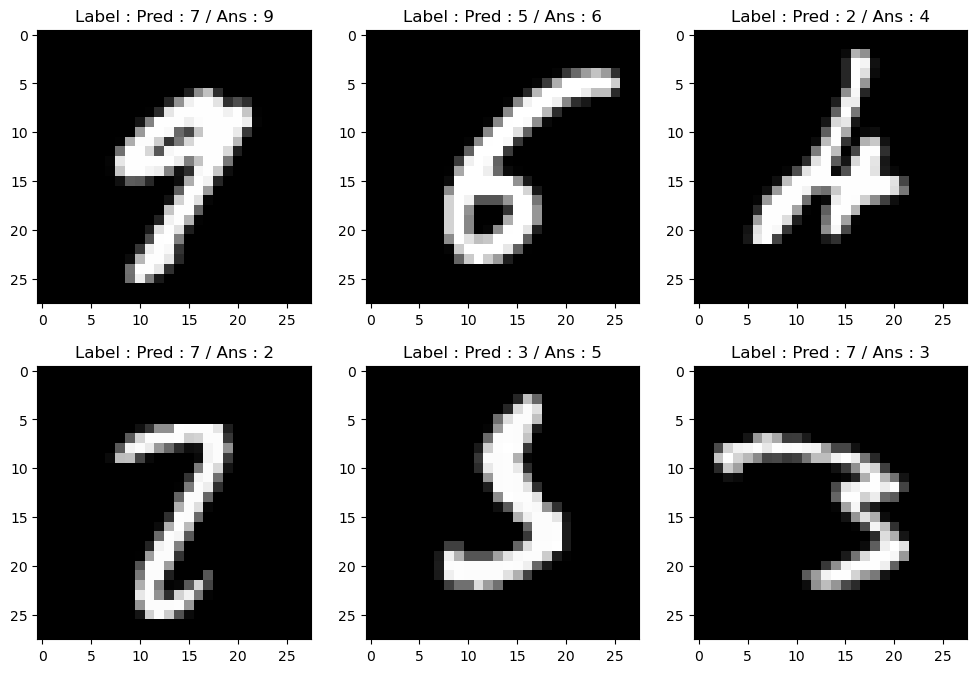

In [38]:
import matplotlib.pyplot as plt

num_samples = 6
plt.figure(figsize=(12, 8))

num = 230
cnt = 1

for i in range(num_samples):
    index = misclassified_index[i]  
    label = y_pred_labels[index]  
    origin = y_test[index]  
    image = X_test[index].reshape(28, 28)  
    plt.subplot(num + cnt)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label : Pred : {label} / Ans : {origin}') 
    cnt += 1

plt.show()
